
# Diabetes (clustering)
다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

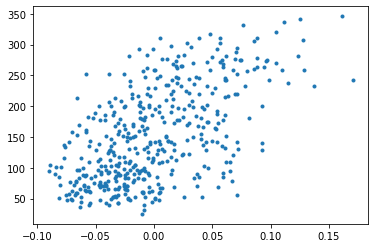

In [5]:
X_p=diabetes.data[:,2] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'.')

## sklearn을 이용하지 않고 (자신의 코드로)

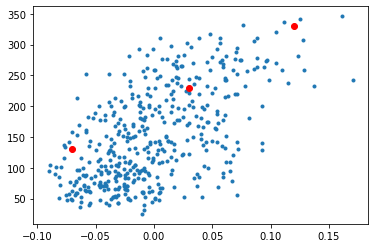

In [6]:
D = [[-0.07,0.03,0.12],[130,230,330]]
d1 = [D[0][0],D[1][0]]
d2 = [D[0][1],D[1][1]]
d3 = [D[0][2],D[1][2]]
plt.plot(X_p,X_d,'.')
plt.plot(D[0],D[1],'ro')

In [7]:
r1 = np.sqrt((X_p-d1[0])**2 + (X_d-d1[1])**2)
r2 = np.sqrt((X_p-d2[0])**2 + (X_d-d2[1])**2)
r3 = np.sqrt((X_p-d3[0])**2 + (X_d-d3[1])**2)

In [8]:
g = np.array([])
for i in range(len(r1)):
    g = np.append(g,np.argmin([r1[i],r2[i],r3[i]]))

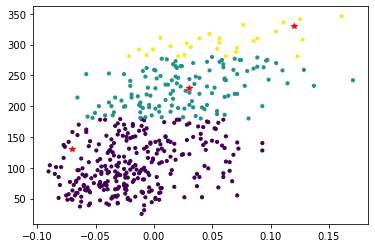

In [9]:
plt.scatter(X_p,X_d,c=g,s=10)
plt.plot(D[0],D[1],'r*')

In [10]:
l,A1,A2 = 0,0,0
m,B1,B2 = 0,0,0
n,C1,C2 = 0,0,0
for i in range(len(r1)):
    if(g[i]==0):
        l += 1
        A1 += X_p[i]
        A2 += X_d[i]
    elif(g[i]==1):
        m += 1
        B1 += X_p[i]
        B2 += X_d[i]
    elif(g[i]==2):
        n += 1
        C1 += X_p[i]
        C2 += X_d[i]
a = [A1/l,A2/l]
b = [B1/m,B2/m]
c = [C1/n,C2/n]
C = [[a[0],b[0],c[0]],[a[1],b[1],c[1]]]
C

[[-0.0171348178220132, 0.026003081095283796, 0.057265201326067036],
 [103.44405594405595, 228.3875968992248, 303.55555555555554]]

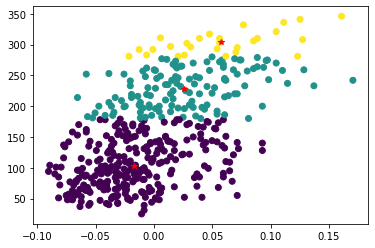

In [11]:
plt.scatter(X_p,X_d,c=g)
plt.plot(C[0],C[1],'r*')

In [12]:
R1 = np.sqrt((X_p-a[0])**2 + (X_d-a[1])**2)
R2 = np.sqrt((X_p-b[0])**2 + (X_d-b[1])**2)
R3 = np.sqrt((X_p-c[0])**2 + (X_d-c[1])**2)
[np.sum(R1), np.sum(r1)], [np.sum(R2), np.sum(r2)], [np.sum(R3), np.sum(r3)]

([31195.29629436684, 28949.075954127446],
 [41224.23757048267, 41639.07066995392],
 [67339.23232867489, 78687.02275911922])

In [13]:
G = np.array([])
for i in range(len(R1)):
    G = np.append(G,np.argmin([R1[i],R2[i],R3[i]]))

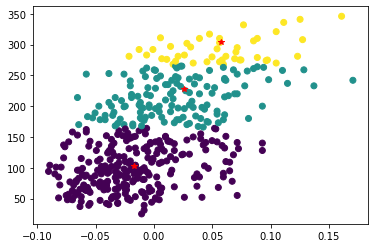

In [14]:
plt.scatter(X_p,X_d,c=G)
plt.plot(C[0],C[1],'r*')

## sklearn을 이용해서

In [15]:
from sklearn.cluster import KMeans

In [16]:
X = [X_p,X_d]
km = KMeans(n_clusters = 3)
data = np.transpose(X)
km.fit(data)

KMeans(n_clusters=3)

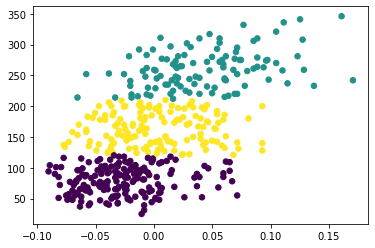

In [17]:
plt.scatter(X_p,X_d,c=km.labels_,s=30)

## cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

### 다른 방법이 있을지도 모르지만,<br><br> 직접 코드를 작성했을 때는 기준점을 정해서 data와의 거리가 최소인 값들을 모아서 다시 기준점을 정했기 때문에<br><br> 기준점을 잘 설정한다면, (거리/cluster)= (data 수)가 될 때 까지 감소할 것이고,<br><br> 그 감소율이 최대가 될 때의 cluster를 설정하는게 좋을거라 생각한다. 

In [18]:
#cluster = 3
np.sum([R1,R2,R3])/3

46586.25539784147

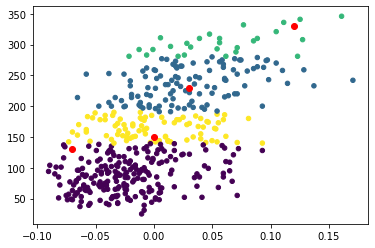

In [19]:
#cluster = 4
D4 = [[-0.07,0.03,0.12,0],[130,230,330,150]]
d41 = [D4[0][0],D4[1][0]]
d42 = [D4[0][1],D4[1][1]]
d43 = [D4[0][2],D4[1][2]]
d44 = [D4[0][3],D4[1][3]]
r41 = np.sqrt((X_p-d41[0])**2 + (X_d-d41[1])**2)
r42 = np.sqrt((X_p-d42[0])**2 + (X_d-d42[1])**2)
r43 = np.sqrt((X_p-d43[0])**2 + (X_d-d43[1])**2)
r44 = np.sqrt((X_p-d44[0])**2 + (X_d-d44[1])**2)
g4 = np.array([])
for i in range(len(r41)):
    g4 = np.append(g4,np.argmin([r41[i],r42[i],r43[i],r44[i]]))
plt.scatter(X_p,X_d,c=g4,s=20)
plt.plot(D4[0],D4[1],'ro')

In [20]:
l4,A41,A42 = 0,0,0
m4,B41,B42 = 0,0,0
n4,C41,C42 = 0,0,0
o4,E41,E42 = 0,0,0
for i in range(len(r41)):
    if(g4[i]==0):
        l4 += 1
        A41 += X_p[i]
        A42 += X_d[i]
    elif(g4[i]==1):
        m4 += 1
        B41 += X_p[i]
        B42 += X_d[i]
    elif(g4[i]==2):
        n4 += 1
        C41 += X_p[i]
        C42 += X_d[i]
    elif(g4[i]==3):
        o4 += 1
        E41 += X_p[i]
        E42 += X_d[i]
a4 = [A41/l4,A42/l4]
b4 = [B41/m4,B42/m4]
c4 = [C41/n4,C42/n4]
e4 = [E41/o4,E42/o4]
C4 = [[a4[0],b4[0],c4[0],e4[0]],[a4[1],b4[1],c4[1],e4[1]]]

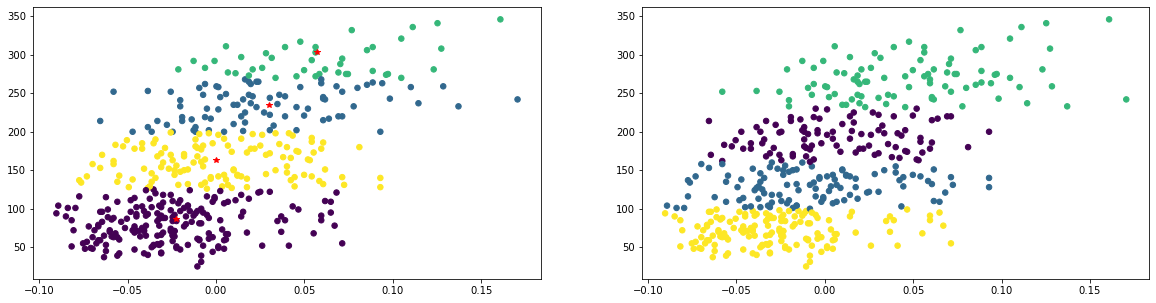

In [21]:
R41 = np.sqrt((X_p-a4[0])**2 + (X_d-a4[1])**2)
R42 = np.sqrt((X_p-b4[0])**2 + (X_d-b4[1])**2)
R43 = np.sqrt((X_p-c4[0])**2 + (X_d-c4[1])**2)
R44 = np.sqrt((X_p-e4[0])**2 + (X_d-e4[1])**2)
G4 = np.array([])
for i in range(len(R41)):
    G4 = np.append(G4,np.argmin([R41[i],R42[i],R43[i],R44[i]]))
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(C4[0],C4[1],'r*')
plt.scatter(X_p,X_d,c=G4,s=30)
km4 = KMeans(n_clusters = 4)
km4.fit(data)
plt.subplot(122)
plt.scatter(X_p,X_d,c=km4.labels_,s=30)

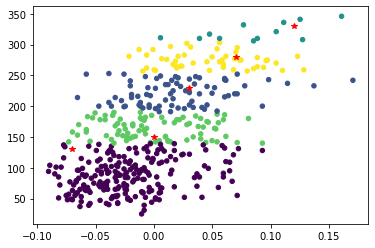

In [22]:
#cluster = 5
D5 = [[-0.07,0.03,0.12,0,0.07],[130,230,330,150,280]]
d51 = [D5[0][0],D5[1][0]]
d52 = [D5[0][1],D5[1][1]]
d53 = [D5[0][2],D5[1][2]]
d54 = [D5[0][3],D5[1][3]]
d55 = [D5[0][4],D5[1][4]]
r51 = np.sqrt((X_p-d51[0])**2 + (X_d-d51[1])**2)
r52 = np.sqrt((X_p-d52[0])**2 + (X_d-d52[1])**2)
r53 = np.sqrt((X_p-d53[0])**2 + (X_d-d53[1])**2)
r54 = np.sqrt((X_p-d54[0])**2 + (X_d-d54[1])**2)
r55 = np.sqrt((X_p-d55[0])**2 + (X_d-d55[1])**2)
g5 = np.array([])
for i in range(len(r51)):
    g5 = np.append(g5,np.argmin([r51[i],r52[i],r53[i],r54[i],r55[i]]))
plt.scatter(X_p,X_d,c=g5,s=20)
plt.plot(D5[0],D5[1],'r*')

In [23]:
l5,A51,A52 = 0,0,0
m5,B51,B52 = 0,0,0
n5,C51,C52 = 0,0,0
o5,E51,E52 = 0,0,0
p5,F51,F52 = 0,0,0
for i in range(len(r51)):
    if(g5[i]==0):
        l5 += 1
        A51 += X_p[i]
        A52 += X_d[i]
    elif(g5[i]==1):
        m5 += 1
        B51 += X_p[i]
        B52 += X_d[i]
    elif(g5[i]==2):
        n5 += 1
        C51 += X_p[i]
        C52 += X_d[i]
    elif(g5[i]==3):
        o5 += 1
        E51 += X_p[i]
        E52 += X_d[i]
    elif(g5[i]==4):
        p5 += 1
        F51 += X_p[i]
        F52 += X_d[i]
a5 = [A51/l5,A52/l5]
b5 = [B51/m5,B52/m5]
c5 = [C51/n5,C52/n5]
e5 = [E51/o5,E52/o5]
f5 = [F51/p5,F52/p5]
C5 = [[a5[0],b5[0],c5[0],e5[0],f5[0]],[a5[1],b5[1],c5[1],e5[1],f5[1]]]

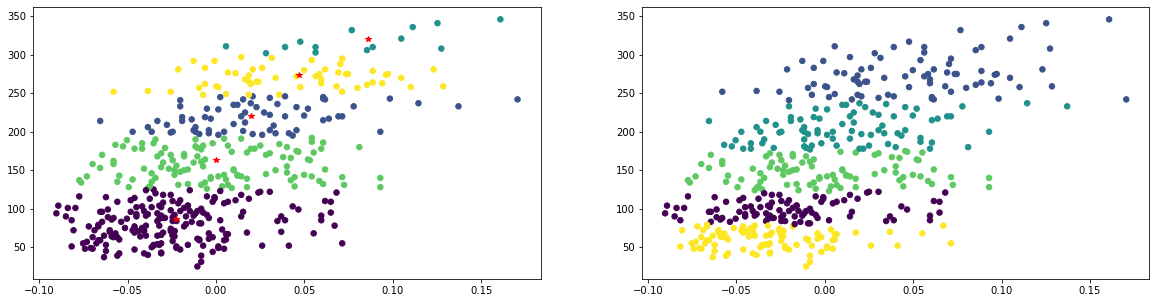

In [24]:
R51 = np.sqrt((X_p-a5[0])**2 + (X_d-a5[1])**2)
R52 = np.sqrt((X_p-b5[0])**2 + (X_d-b5[1])**2)
R53 = np.sqrt((X_p-c5[0])**2 + (X_d-c5[1])**2)
R54 = np.sqrt((X_p-e5[0])**2 + (X_d-e5[1])**2)
R55 = np.sqrt((X_p-f5[0])**2 + (X_d-f5[1])**2)
G5 = np.array([])
for i in range(len(R51)):
    G5 = np.append(G5,np.argmin([R51[i],R52[i],R53[i],R54[i],R55[i]]))
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(X_p,X_d,c=G5,s=30)
plt.plot(C5[0],C5[1],'r*')
km5 = KMeans(n_clusters = 5)
km5.fit(data)
plt.subplot(122)
plt.scatter(X_p,X_d,c=km5.labels_,s=30)

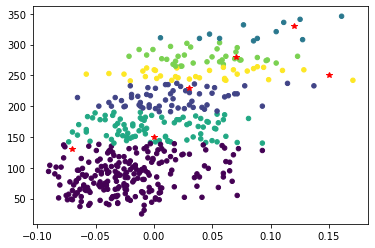

In [25]:
D6 = [[-0.07,0.03,0.12,0,0.07,0.15],[130,230,330,150,280,250]]
d61 = [D6[0][0],D6[1][0]]
d62 = [D6[0][1],D6[1][1]]
d63 = [D6[0][2],D6[1][2]]
d64 = [D6[0][3],D6[1][3]]
d65 = [D6[0][4],D6[1][4]]
d66 = [D6[0][5],D6[1][5]]
r61 = np.sqrt((X_p-d61[0])**2 + (X_d-d61[1])**2)
r62 = np.sqrt((X_p-d62[0])**2 + (X_d-d62[1])**2)
r63 = np.sqrt((X_p-d63[0])**2 + (X_d-d63[1])**2)
r64 = np.sqrt((X_p-d64[0])**2 + (X_d-d64[1])**2)
r65 = np.sqrt((X_p-d65[0])**2 + (X_d-d65[1])**2)
r66 = np.sqrt((X_p-d66[0])**2 + (X_d-d66[1])**2)
g6 = np.array([])
for i in range(len(r61)):
    g6 = np.append(g6,np.argmin([r61[i],r62[i],r63[i],r64[i],r65[i],r66[i]]))
plt.scatter(X_p,X_d,c=g6,s=20)
plt.plot(D6[0],D6[1],'r*')

In [26]:
l6,A61,A62 = 0,0,0
m6,B61,B62 = 0,0,0
n6,C61,C62 = 0,0,0
o6,E61,E62 = 0,0,0
p6,F61,F62 = 0,0,0
q6,H61,H62 = 0,0,0
for i in range(len(r61)):
    if(g6[i]==0):
        l6 += 1
        A61 += X_p[i]
        A62 += X_d[i]
    elif(g6[i]==1):
        m6 += 1
        B61 += X_p[i]
        B62 += X_d[i]
    elif(g6[i]==2):
        n6 += 1
        C61 += X_p[i]
        C62 += X_d[i]
    elif(g6[i]==3):
        o6 += 1
        E61 += X_p[i]
        E62 += X_d[i]
    elif(g6[i]==4):
        p6 += 1
        F61 += X_p[i]
        F62 += X_d[i]
    elif(g6[i]==5):
        q6 += 1
        H61 += X_p[i]
        H62 += X_d[i]
a6 = [A61/l6,A62/l6]
b6 = [B61/m6,B62/m6]
c6 = [C61/n6,C62/n6]
e6 = [E61/o5,E62/o5]
f6 = [F61/p6,F62/p6]
h6 = [H61/q6,H62/q6]
C6 = [[a6[0],b6[0],c6[0],e6[0],f6[0],h6[0]],[a6[1],b6[1],c6[1],e6[1],f6[1],h6[1]]]

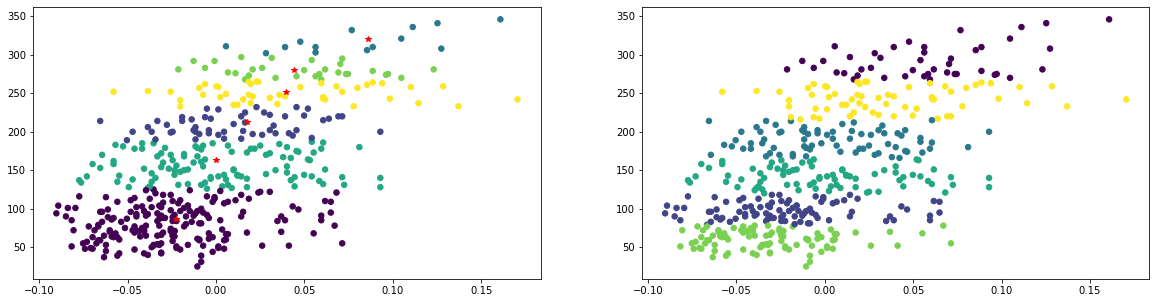

In [27]:
R61 = np.sqrt((X_p-a6[0])**2 + (X_d-a6[1])**2)
R62 = np.sqrt((X_p-b6[0])**2 + (X_d-b6[1])**2)
R63 = np.sqrt((X_p-c6[0])**2 + (X_d-c6[1])**2)
R64 = np.sqrt((X_p-e6[0])**2 + (X_d-e6[1])**2)
R65 = np.sqrt((X_p-f6[0])**2 + (X_d-f6[1])**2)
R66 = np.sqrt((X_p-h6[0])**2 + (X_d-h6[1])**2)
G6 = np.array([])
for i in range(len(R61)):
    G6 = np.append(G6,np.argmin([R61[i],R62[i],R63[i],R64[i],R65[i],R66[i]]))
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(X_p,X_d,c=G6,s=30)
plt.plot(C6[0],C6[1],'r*')
km6 = KMeans(n_clusters = 6)
km6.fit(data)
plt.subplot(122)
plt.scatter(X_p,X_d,c=km6.labels_,s=30)

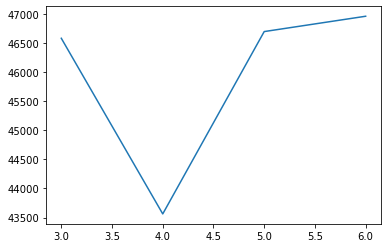

In [28]:
cluster = np.array([3,4,5,6])
y = np.array([np.sum([R1,R2,R3])/3,np.sum([R41,R42,R43,R44])/4,np.sum([R51,R52,R53,R54,R55])/5,np.sum([R61,R62,R63,R64,R65,R66])/6])
plt.plot(cluster,y)

가장 감소율이 높은 cluster를 쓰고자 한다면 4가 될 것이다.

예상과 다르게 그래프가 꾸준히 내려가지 않고 cluster = 5 에서 반등을 하는데<br>
아마 5 부터 임의로 정한 초기 기준점이 적절하지 않아서 한번의 최적화로는 유의미한 조정이 되지 않았기 때문으로 보인다.<br>
sklearn 과 작성한 코드의 그래프를 비교하면 cluster = 4까지는 비교적 비슷하게 나오나,<br> cluster = 5 이상에서는 sklearn 으로 구한 결과와 비교하면 잘 구분되지 않았다는 걸 확인할 수 있다.<br>

In [31]:
inertia_arr = []
k_range = range(3,10)
for k in k_range:
    Kmeans = KMeans(n_clusters=k)
    Kmeans.fit(data)
    interia = Kmeans.inertia_
    inertia_arr.append(interia)
inertia_arr = np.array(inertia_arr)

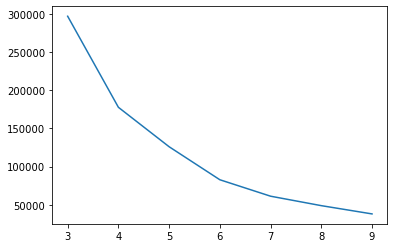

In [32]:
plt.plot(k_range,inertia_arr)

sklearn 에서 cluster와 data 간의 거리의 총합을 나타내주는 inertia 를 사용하여 그린 그래프에서는 <br>처음 예상과 부합하게 cluster 가 많아질수록 거리의 총합이 낮아지는 그래프를 보여준다.<br> 여기서 적절한 cluster 수를 찾는다면, 4~6 정도가 좋아보인다.<br> 찾아보니 이런 방식을 Elbow Method 라고 부르는데, 이 방식으로 적절한 cluster 수를 찾기 위해서는 기준점의 최적화가 잘 되어 있어야 되는 것을 확인했다.